In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
#defining the batch_size
batch_size = 64
#Defining the transforms for the data
transform = transforms.ToTensor()

#Getting the data
train_data = datasets.MNIST('data',download=True,
                           train = True, transform = transform)

#Preparing the dataloader
train_loader = DataLoader(train_data, batch_size=batch_size,
                         shuffle = True, num_workers=0)

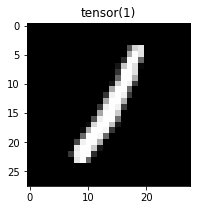

In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

i = 7
img=np.squeeze(images[i])

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
ax.set_title(labels[i])
plt.show()



### The model


In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(16,4)
        self.fc4 = nn.Linear(4,1)

        self.dropout = nn.Dropout(0.3)

    def forward(self,x):
        
        x = x.view(-1,28*28)

        x = F.leaky_relu(self.fc1(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        out = self.fc4(x)
        return out

In [11]:
class Generator(nn.Module):
    def __init__(self,input_size,hidden_dim, output_size):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size,hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4,hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2,hidden_dim)
        self.fc4 = nn.Linear(hidden_dim,output_size)

        self.dropout = nn.Dropout(0.3)

    def forward(self,x):

        x = F.leaky_relu(self.fc1(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        out = F.tanh(self.fc4(x))
        return out

In [12]:
model = Discriminator()
model

Discriminator(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (fc4): Linear(in_features=4, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)